<a href="https://colab.research.google.com/github/thecfitz/pytorch-tutorial/blob/main/simple_neuralnetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [ ]:
# create a model class that inherits nn.module
class Model(nn.Module):
  def __init__(self, in_features=4, h1=8, h2=9, out_features=3):
    super().__init__() #instantiate our nn.Module
    self.fc1 = nn.Linear(in_features, h1)
    self.fc2 = nn.Linear(h1, h2)
    self.out = nn.Linear(h2, out_features)

  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.out(x)

    return x

In [ ]:
#need a seed for reproducability
torch.manual_seed(314)
#create an instance of model
model = Model()

In [ ]:
#for visualization
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd


In [ ]:
#creates a dataframe from the iris data
url = 'https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv'
my_df = pd.read_csv(url)
my_df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [ ]:
#convert the species column to numerical values
my_df['species'] = my_df['species'].replace('setosa', 0.0)
my_df['species'] = my_df['species'].replace('versicolor', 1.0)
my_df['species'] = my_df['species'].replace('virginica', 2.0)
my_df

<ipython-input-11-c9c0e5f866a8>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  my_df['species'] = my_df['species'].replace('virginica', 2.0)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [ ]:
# train/test split
X = my_df.drop('species', axis=1)
y = my_df['species']

In [ ]:
#convert these to numpy arrays
X = X.values
y = y.values

In [ ]:
#sci-kit learn function does the splitting of the data of training and testing for you
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

#print out the shape of the training/testing splits
print("training set shape: ", X_train.shape, y_train.shape)
print("testing set shape:", X_test.shape, y_test.shape)

training set shape:  (120, 4) (120,)
testing set shape: (30, 4) (30,)


In [ ]:
#convert X features to float tensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

In [ ]:
#convert y labels to long tensors
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [ ]:
#set the criterion of model to measure the error (loss function)
criterion = nn.CrossEntropyLoss()
# choose  adam optimizer, 1 = learning rate
optimizer = torch.optim.Adam(model.parameters(), lr=.01)

In [ ]:
#train our model
epochs = 100
losses = []
for i in range(epochs):
  #go forward and get a prediction
  y_pred = model.forward(X_train) #get predicted results

  #measure the loss/error
  loss = criterion(y_pred, y_train) #predicted values vs the y-Train

  #keep track of losses
  losses.append(loss.detach().numpy()) #we need to graph the losses, and loss is a tensor, so this turns it into a numpy

  # print every 10 epochs
  if i % 10 == 0:
    print(f'Epoch: {i} and loss: {loss}')

  #do some back propogation
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()




Epoch: 0 and loss: 1.1443487405776978
Epoch: 10 and loss: 0.9850178956985474
Epoch: 20 and loss: 0.7297504544258118
Epoch: 30 and loss: 0.4609467685222626
Epoch: 40 and loss: 0.30950304865837097
Epoch: 50 and loss: 0.19659870862960815
Epoch: 60 and loss: 0.11905763298273087
Epoch: 70 and loss: 0.08293381333351135
Epoch: 80 and loss: 0.06803945451974869
Epoch: 90 and loss: 0.06122342869639397


Text(0.5, 0, 'epoch')

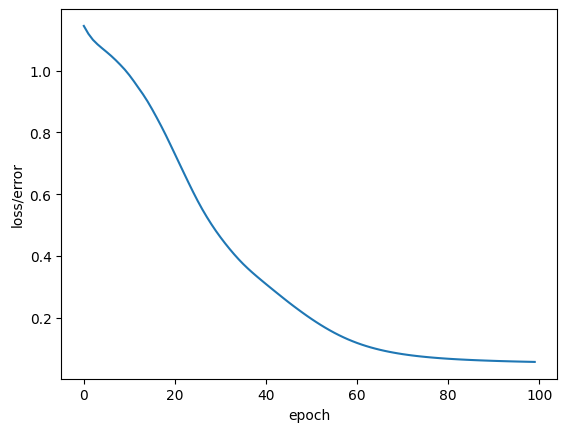

In [ ]:
# graph it out
plt.plot(range(epochs), losses)
plt.ylabel("loss/error")
plt.xlabel("epoch")